In [1]:
%matplotlib inline

In [2]:
from Bio import SeqIO
from matplotlib import pyplot as plt
import numpy as np

In [3]:
genome = list(SeqIO.parse('../Data/examples_for_testing/ecoli.gbk', "genbank"))
assert len(genome)== 1
genome = genome [0]

In [4]:
print(genome)

ID: NC_000913.3
Name: NC_000913
Description: Escherichia coli str. K-12 substr. MG1655, complete genome
Database cross-references: BioProject:PRJNA57779, BioSample:SAMN02604091, Assembly:GCF_000005845.2
Number of features: 9900
/molecule_type=DNA
/topology=circular
/data_file_division=CON
/date=11-OCT-2018
/accessions=['NC_000913']
/sequence_version=3
/keywords=['RefSeq']
/source=Escherichia coli str. K-12 substr. MG1655
/organism=Escherichia coli str. K-12 substr. MG1655
/taxonomy=['Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Enterobacterales', 'Enterobacteriaceae', 'Escherichia']
/references=[Reference(title='Escherichia coli K-12: a cooperatively developed annotation snapshot--2005', ...), Reference(title='Highly accurate genome sequences of Escherichia coli K-12 strains MG1655 and W3110', ...), Reference(title='The complete genome sequence of Escherichia coli K-12', ...), Reference(title='Workshop on Annotation of Escherichia coli K-12', ...), Reference(title='ASAP: Escher

In [5]:
example_feature = genome.features[2]

In [6]:
print(example_feature)

type: CDS
location: [189:255](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['UniProtKB/Swiss-Prot:P0AD86', 'ASAP:ABE-0000006', 'ECOCYC:EG11277', 'EcoGene:EG11277', 'GeneID:944742']
    Key: gene, Value: ['thrL']
    Key: gene_synonym, Value: ['ECK0001']
    Key: locus_tag, Value: ['b0001']
    Key: product, Value: ['thr operon leader peptide']
    Key: protein_id, Value: ['NP_414542.1']
    Key: transl_table, Value: ['11']
    Key: translation, Value: ['MKRISTTITTTITITTGNGAG']



In [49]:
# example_feature.qualifiers["translation"]
# assert len(example_feature.qualifiers["translation"]) == 1
# len(example_feature.qualifiers["translation"][0])

#example_feature.location.end - example_feature.location.start
#example_feature.extract(genome.seq)
# len(example_feature.extract(genome.seq))

21

In [31]:
#genome.seq[189:255]#.reverse_complement()

Seq('ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAAC...TGA', IUPACAmbiguousDNA())

In [7]:
cds_length = []
for feature in genome.features:
    if feature.type == "CDS":
        tmp_len = feature.location.end - feature.location.start
        try:
            assert tmp_len % 3 == 0
            cds_length.append(tmp_len)
        except AssertionError:
            print('Error on this gene:', feature.qualifiers['gene'])
#         print(tmp_len)
#         assert tmp_len % 3 == 0
#         cds_length.append(tmp_len)

Error on this gene: ['crl']
Error on this gene: ['insN']
Error on this gene: ['afuB']
Error on this gene: ['yaiX']
Error on this gene: ['yaiT']
Error on this gene: ['dnaX']
Error on this gene: ['copA']
Error on this gene: ['ybbD']
Error on this gene: ['renD']
Error on this gene: ['nmpC']
Error on this gene: ['ybcY']
Error on this gene: ['ybeM']
Error on this gene: ['efeU']
Error on this gene: ['ycgH']
Error on this gene: ['ycgI']
Error on this gene: ['gapC']
Error on this gene: ['yncI']
Error on this gene: ['yneL']
Error on this gene: ['yneO']
Error on this gene: ['arpB']
Error on this gene: ['yedN']
Error on this gene: ['yedS']
Error on this gene: ['yoeA']
Error on this gene: ['wbbL']
Error on this gene: ['gatR']
Error on this gene: ['gatC']
Error on this gene: ['mdtQ']
Error on this gene: ['yejO']
Error on this gene: ['yfjV']
Error on this gene: ['ypjI']
Error on this gene: ['ygaY']
Error on this gene: ['ygeF']
Error on this gene: ['pbl']
Error on this gene: ['ygeN']
Error on this ge

In [8]:
len(cds_length)

4310

In [9]:
1178%3

2

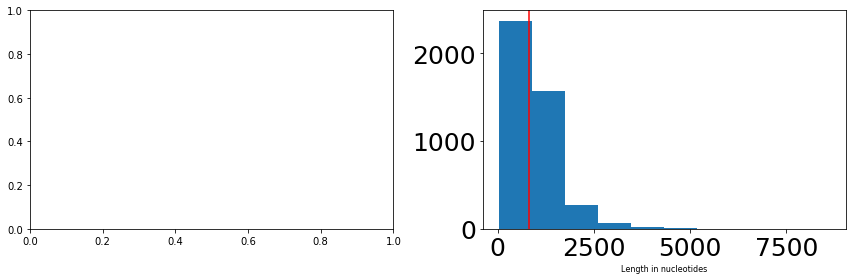

In [10]:
fig, ax_arr = plt.subplots(ncols=2, figsize=(12, 4))
ax_arr[1].hist(cds_length)
ax_arr[1].set_xlabel('Length in nucleotides', fontsize = 8)
ax_arr[1].tick_params(labelsize=25)
ax_arr[1].axvline(np.median(cds_length), c='r')
plt.tight_layout()

In [65]:
len(cds_length)

47

# Find how many of each different start codon are used in the E coli genome

In [28]:
start_codon_counts = {}

for feature in genome.features:
    if feature.type == "CDS":
        start_loc = feature.location.start
        start_seq = genome.seq[start_loc:start_loc+3]
         
        end_loc = feature.location.end
        end_seq = genome.seq[end_loc - 3: end_loc]
        
        if str(start_seq) not in start_codon_counts.keys():
            if feature.location.strand == 1:
                start_codon_counts[str(start_seq)] = 1
                
            else: #feature.location.strand == -1:
                start_codon_counts[str(end_seq)] = 1

        else: #str(start_seq) or str(end_seq) in start_codon_counts.keys():
            if feature.location.strand == 1:
                start_codon_counts[str(start_seq)] += 1
                
            else: #feature.location.strand == -1:  
                start_codon_counts[str(end_seq)] += 1
            
#         elif feature.location.strand == -1:
#             end_loc = feature.location.end
#             end_seq = genome.seq[end_loc - 3: end_seq]
#             if str(end_seq) not in start_codon_counts.keys():
#                 start_codon_counts[str(end_seq)] = 1
#             else:
#                 start_codon_counts[str(end_seq)] += 1
            
            
#print(start_codon_counts)
for key in start_codon_counts:
    print(key, "\t", start_codon_counts[key])
    
    
#figure out way to deal with bottom strand start codons using 

ATG 	 1908
GTG 	 170
CAT 	 1
CAC 	 1
CAA 	 1
TTG 	 37
AAT 	 1
CAG 	 1
GTC 	 1
CCC 	 1
GAT 	 1
ATT 	 2
GGA 	 1
TAT 	 1
GGT 	 1
TTC 	 1
GGC 	 1
CTG 	 1
TCT 	 1
GTT 	 1
AAG 	 1
CCA 	 1
CTA 	 1


In [14]:
feature
for feature in genome.features:
    if feature.type == "CDS":
        print(feature.location.strand)

1
1
1
1
1
-1
-1
1
1
-1
-1
1
-1
1
1
1
-1
-1
1
1
-1
-1
-1
1
1
1
1
1
1
1
1
1
1
1
-1
-1
-1
-1
-1
-1
1
1
1
1
1
1
1
1
-1
-1
-1
-1
-1
-1
1
1
1
-1
-1
-1
-1
-1
-1
1
1
-1
-1
-1
-1
1
1
-1
-1
-1
-1
-1
1
-1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
-1
-1
-1
1
1
-1
-1
-1
-1
1
1
-1
1
1
1
1
-1
1
1
-1
-1
-1
1
-1
1
-1
1
1
1
1
-1
1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
1
1
1
1
1
1
-1
1
1
1
-1
-1
-1
1
1
1
-1
-1
-1
-1
-1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
-1
-1
1
1
1
-1
-1
-1
-1
-1
-1
-1
1
1
-1
1
1
-1
-1
1
-1
1
1
-1
-1
1
-1
1
-1
1
1
-1
-1
-1
1
1
-1
1
1
1
1
1
1
1
-1
1
1
1
-1
-1
-1
1
1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
1
1
1
-1
1
1
-1
-1
-1
-1
-1
-1
1
1
1
1
-1
-1
1
-1
-1
1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
1
-1
-1
-1
-1
-1
-1
-1
1
-1
-1
-1
-1
1
1
1
-1
-1
-1
-1
1
1
1
1
-1
-1
-1
-1
1
1
1
-1
-1
1
1
1
1
1
1
1
1
1
1
-1
1
-1
1
1
1
1
1
1
-1
1
1
1
-1
-1
-1
-1
-1
1
1
1
1
1
1
1
1
-1
-1
-1
-1
-1
1
1
-1
1
-1
1
1
1
1
-1
1
-1
-1
1
-1
1
1
-1
1
-1
1
1
1
1
-1
1
1
1
1
1
1
1
-1
1
-1
-1
-1
1
1
1
1
1
-1
1
1
1
1
1


# Find how many of each different start codon are used in the E coli genome

# Extract all the upstream regions (-10 to 0)

In [15]:
upstream = []
for feature in genome.features:
    if feature.type == "CDS":
        start_loc = feature.location.start
        upstream_seq = genome.seq[start_loc - 10:start_loc]
        upstream.append(str(upstream_seq))

        
print(upstream)
        


['CACAACATCC', 'GGTAACAACC', 'GGAGTCTGAC', 'GGAAAACTAA', 'GGAGTAACCT', 'GACTGCAAAC', 'ATAGTTGTGA', 'AAATACTATC', 'AAAAATCTTG', 'CTCAAAACAA', 'GTTTCCGGTA', 'GGTGCGTAAA', 'TATTCTGGCG', 'AGACGTTTAG', 'TTTAAAAAAG', 'TAACGTGCCG', 'GCCGTTGCTC', 'GCCGTTGCTC', 'GAAATAAAAA', 'AGGGAGAGAA', 'TGACTCCAAC', 'ATGCGCGAGG', 'AAATTGGCGA', 'AGCGCCGTTA', 'TGAGCCAGAC', 'CGAGAATCTG', 'AGTTTGCCTG', 'GCAAACCTGC', 'GAGGCGTAAC', 'TGGAGAAAAC', 'GAGAATAGCT', 'GGAGGGTGTT', 'TAAAAGAGCC', 'TGGAGTTCGT', 'TCCGGCAAGA', 'CTCACGGTTG', 'GCTGTTTCAT', 'CGCCACGCGT', 'GCGCACGGAC', 'TGGGGGTTAA', 'TGGAGATGCA', 'AGGGGATGCT', 'GGGAGCTCTT', 'TGACCGTTTT', 'AGGAATAACC', 'CGGGCTACCT', 'GAGGCCCATC', 'GGAAATCTCA', 'CAGGCTGTGT', 'CCATATTCTT', 'TTGATCATCG', 'ACTCGATTAT', 'GTTTTAACCA', 'AATCAACAAA', 'TGGGGAATAT', 'GGCTATTACC', 'CGGTGCTACC', 'ACAGGAAAGG', 'TTCGGCTCCG', 'TTTTTTTTGC', 'TATACAGTCA', 'ATGCGGCTAC', 'TATCGTGTCC', 'TATGAAAAGT', 'CAGGCACATT', 'ACAGTGCATA', 'CCAGGTGATA', 'CAGCCGGGAA', 'CAACCAGCAA', 'GGGGTGCCCC', 'AAGGGAACGT', 'GGCA